## Example of reading CIAO logs and visualizing data

CIAO logs are stored as MATLAB-readable ```.mat``` files, but they can also be read and used in Python. Below are basic instructions on how to read and visualize data stored in these files. First, we have to import some useful modules:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio # for reading mat files
import os,sys,glob # glob is a useful file getter

This notebook sits one level above the log files, at the same level as the ```log/``` directory. Let's grab the contents of that directory and see what's in there.

In [2]:
file_list = glob.glob('log/*.mat')

Now let's load one of the files and examine its contents. We'll grab the first in the list (not the first chronologically, by the way!) and load it. MAT files are opened as dictionaries. The keys should be descriptive, and point at corresponding data.

In [3]:
mat_dict = sio.loadmat(file_list[0])
for k in mat_dict.keys():
    print k

y_centroids
time_seconds
ref_x
zernikes
x_centroids
search_box_x1
search_box_x2
search_box_y2
search_box_y1
tip
__header__
__globals__
y_slopes
x_slopes
error
tilt
ref_y
__version__
wavefront


Now let's look at the Zernike coefficients.

<Container object of 66 artists>

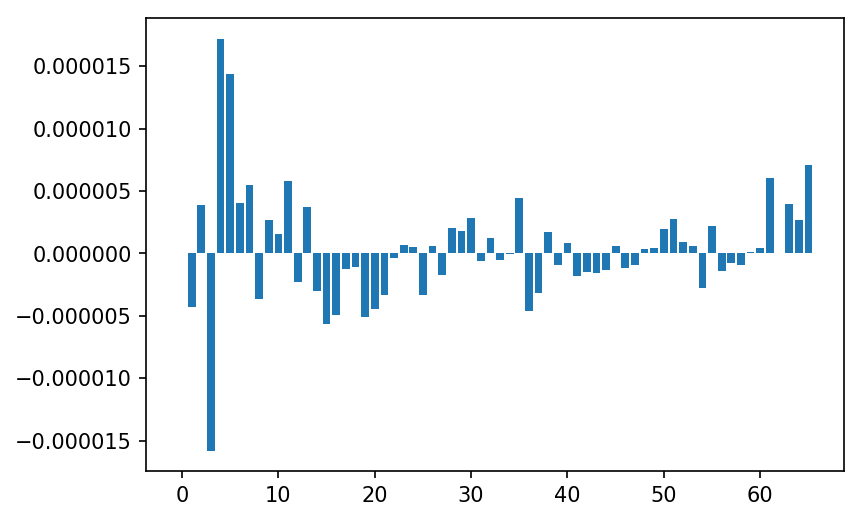

In [4]:
coefs = mat_dict['zernikes'][0,:] 
plt.figure(dpi=150)
plt.bar(range(len(coefs)),coefs)

The first coefficient (```coefs[0]```) is piston, and should always be less than machine epsilon. It won't be exactly zero because it's the result of a matrix multiplication with finite representation of the Zernike partial derivatives, but it should be very small.

In [5]:
print coefs[0]

4.786581967748552e-22


We can also look at the wavefront:

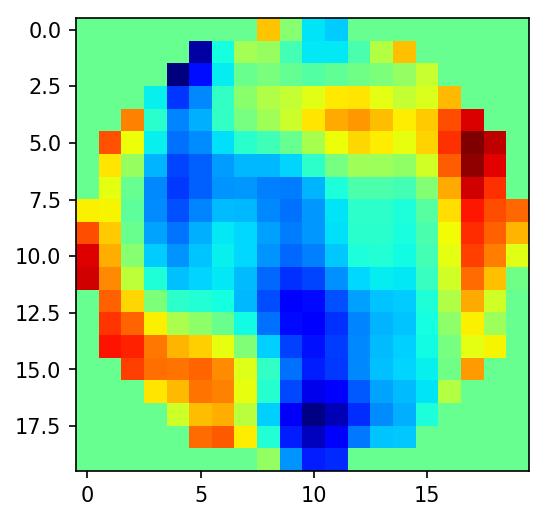

In [6]:
wavefront = mat_dict['wavefront']
plt.figure(dpi=150)
plt.imshow(wavefront,cmap='jet')

Things get a little bit trickier if you want to plot time series, but this is roughly how you'd do it:

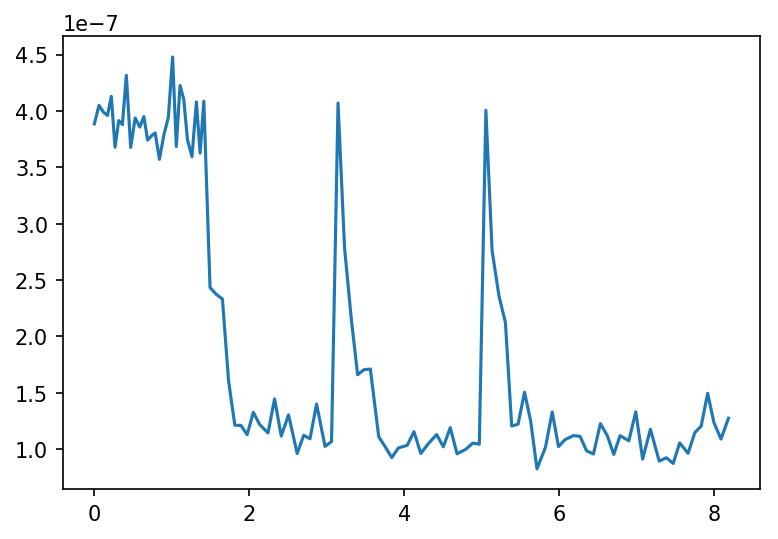

In [7]:
# first sort flist; it's not technically necessary, 
# but if you want your times to monotonically increase
# in the array in which they're stored, this is useful
file_list.sort()
# now initialize empty lists for time and error:
time = []
error = []
# now iterate through the file list and populate the 
# time and error lists:
for f in file_list:
    mat_dict = sio.loadmat(f)
    time.append(mat_dict['time_seconds'])
    error.append(mat_dict['error'])
# turn these lists into arrays:
time = np.squeeze(np.array(time))
error = np.squeeze(np.array(error))
# time is the number of seconds that have elapsed since 
# some day in 1970, so let's start at 0:
time = time - time[0]
# now plot:
plt.figure(dpi=150)
plt.plot(time,error)